In [1]:
pip install -qq google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -qq -U watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

pandas             : 1.0.5
matplotlib         : 3.2.2
seaborn            : 0.10.1
google_play_scraper: 0.1.1



In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [5]:
app_packages = [
  'com.anydo',
  'com.todoist'
]

In [6]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 2/2 [00:00<00:00,  2.65it/s]


In [7]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "<b>\ud83c\udfc6 Editor's Choice by Google</b>\r\n\r\nIt's the #1 to-do list, reminders, planner & calendar app.\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY, WSJ).</b>\r\n\r\nAny.do is a  free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\n\ud83d\udcc5 Organize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar view & 

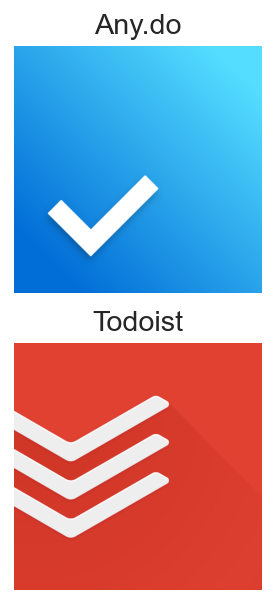

In [9]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [10]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [11]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 2/2 [00:15<00:00,  7.72s/it]


In [12]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2020-11-22 18:42:56",
  "content": "Liked Any.do at first, enough that I even signed up for premium so I could schedule reoccurring tasks. However, I soon learned that it doesn't interface with Google Calendars the way that it claims. Instead, you have to sign up for a 3rd party service called Zapier. The link never worked right. Anything I scheduled in Any.do would stay there and not sync. Initially my purchase receipt said \"cancel anytime,\" but now they won't refund the 10 months of service I haven't used. Left a bitter taste.",
  "repliedAt": "2020-11-25 08:30:01",
  "replyContent": "Please note that Any.do integrates directly with Google Calendar, and you can sync your calendar per the instructions on our Help Center here- support.any.do/calendar-setup. From checking our records, we can see that you have an ongoing ticket with our Support team, that is currently pending your reply. We are happy to help with any questions :)",
  "reviewCreatedVer

In [13]:
len(app_reviews)

2400

In [14]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)